<a href="https://colab.research.google.com/github/mmalinda/DS-Core/blob/master/Moringa_Data_Science_Core_W7_Independent_Project_2020_01_MMalinda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Exercise 2

## 1. Defining the Question

### a) Specifying the Question

Hass Consulting Company would like to predict the sale prices for real estate properties based on data with the factors that affect housing prices. 

### b) Defining the Metric for Success

The analysis will be successful if the model can predict the price of housing based on the given factors.
The variables that have the largest effect on variance in housing price will be identified.

### c) Understanding the context 

The model can be used to update the quarterly Hass Index that gives information on house price inflation to investors, home owners, the financial industry and consumers which can help them to make better decisions on investments and sales.

### d) Recording the Experimental Design

The majority of house price information is derived from sources in the public domain, and drawn from Hass own data, more than 30 other estate agencies in Nairobi, several online property portals, social media, newspapers and magazines. 



### e) Data Relevance

The data is relevant and sufficient to answer this question.

## 2. Reading the Data

In [0]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import scipy as sp
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [0]:
# Loading the Dataset
data = pd.read_csv('Independent Project Week 7 - house_data.csv')

## 3. Checking the Data

In [6]:
# Determining the no. of records in our dataset
data.shape

(21613, 20)

In [7]:
# Previewing the top of our dataset
data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [8]:
# Previewing the bottom of our dataset
data.tail(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [9]:
# Checking whether each column has an appropriate datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


In [10]:
data.describe(include = 'all')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## 5. Tidying the Dataset

###Outliers and Anomalies

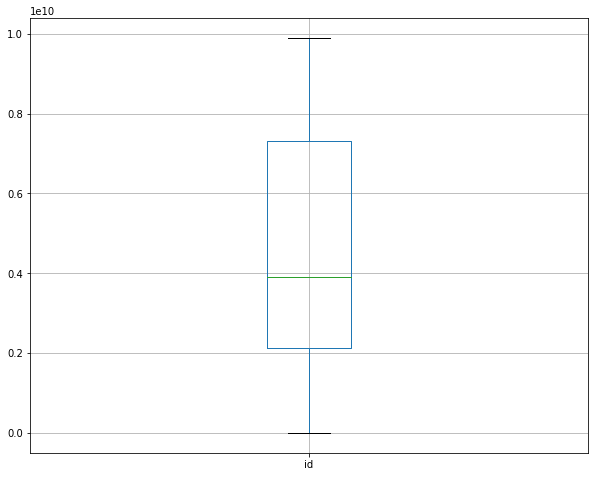

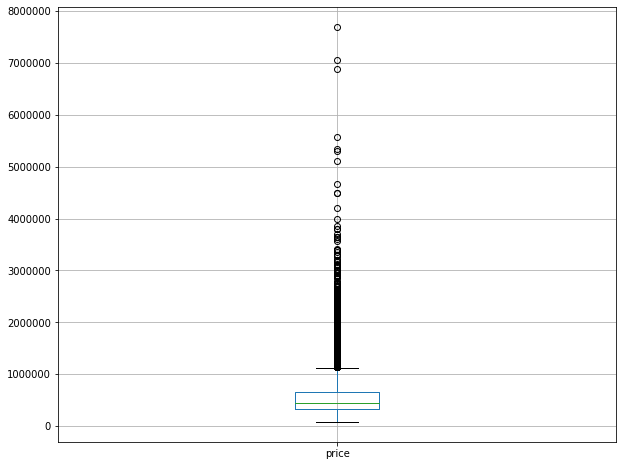

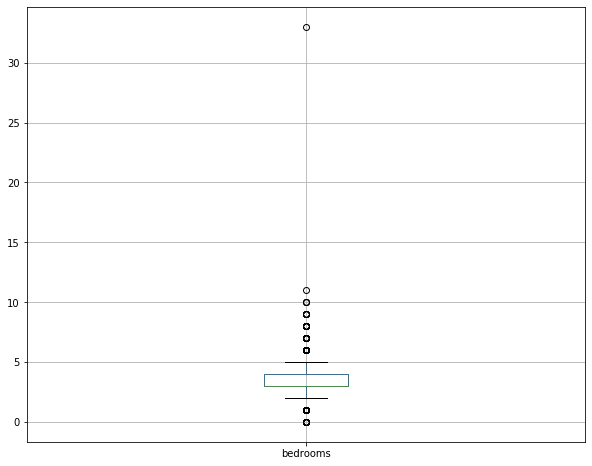

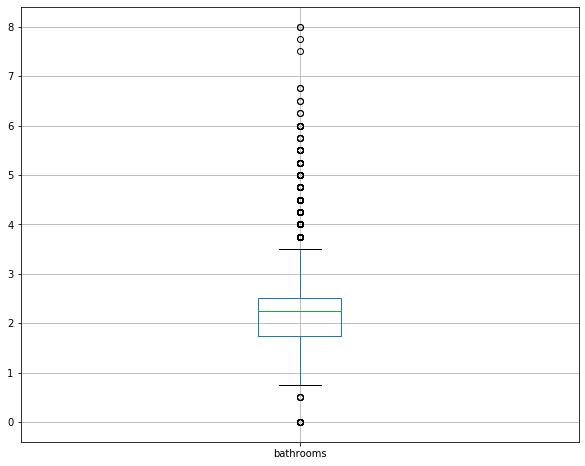

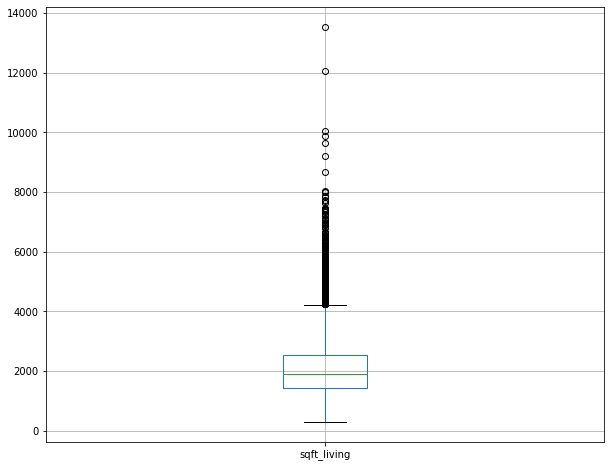

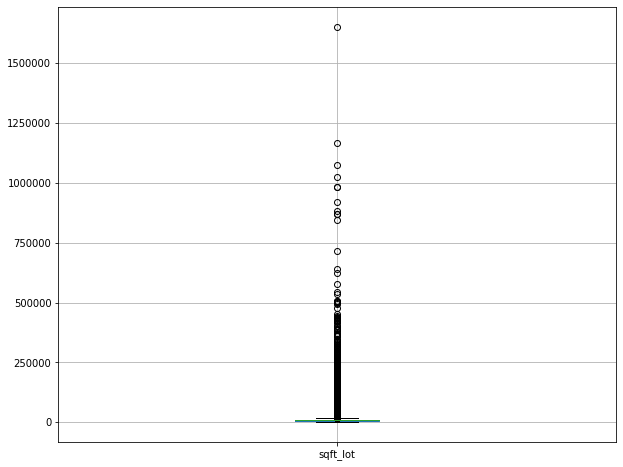

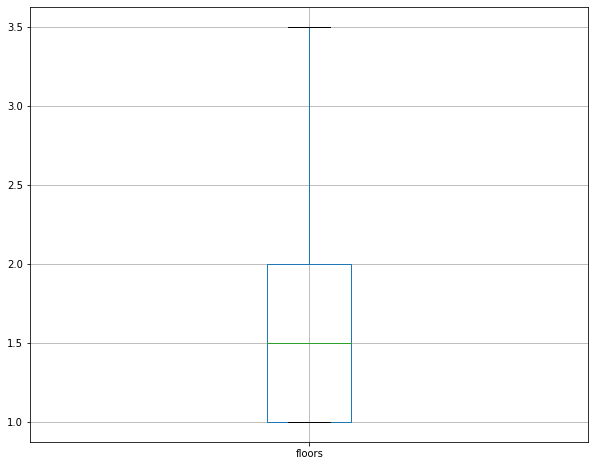

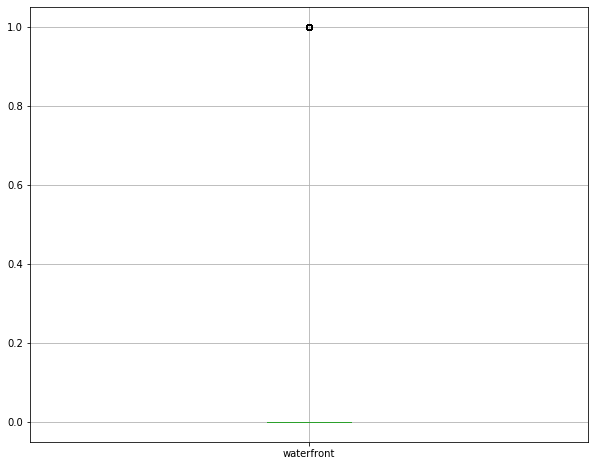

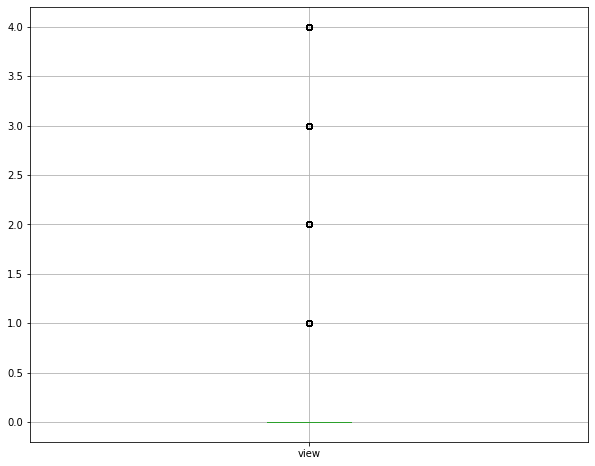

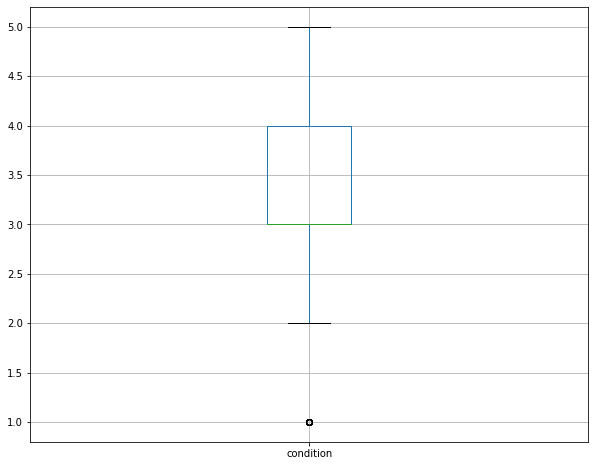

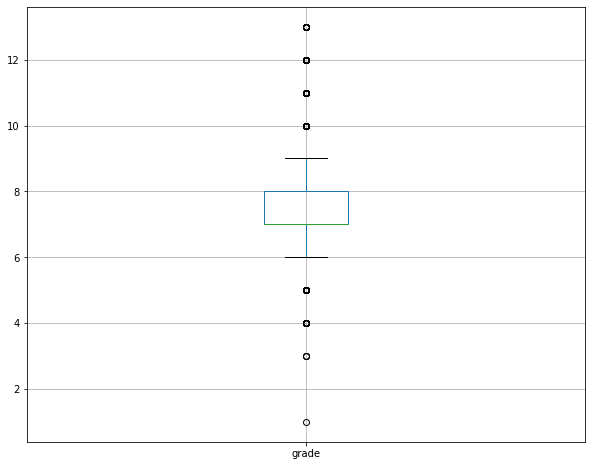

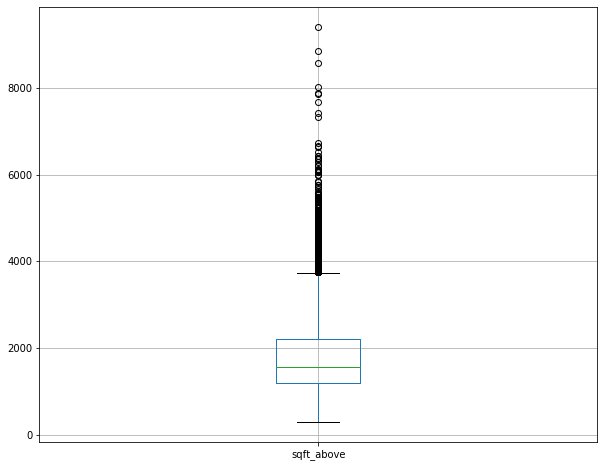

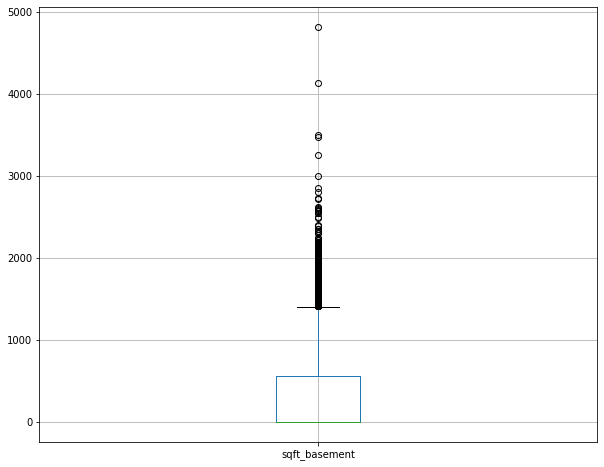

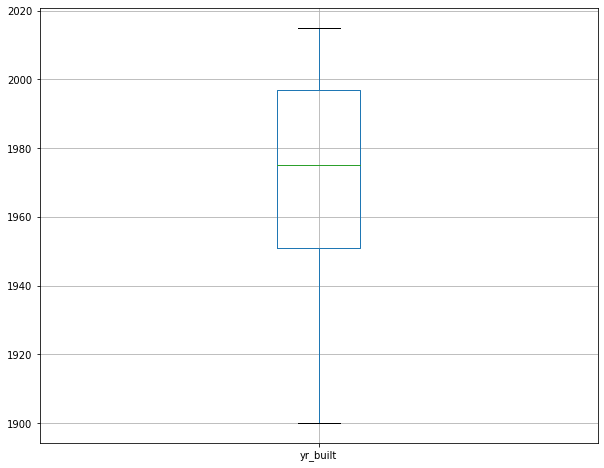

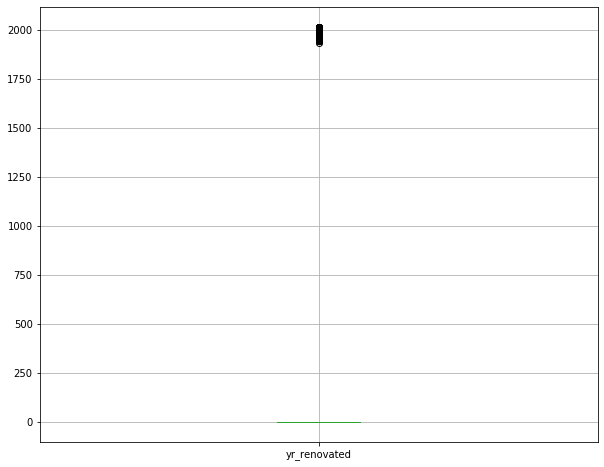

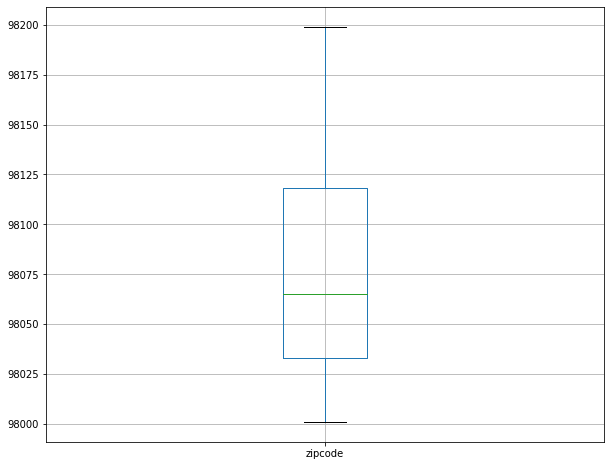

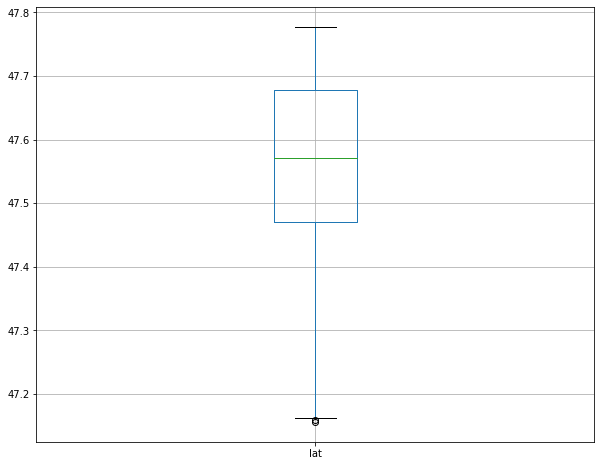

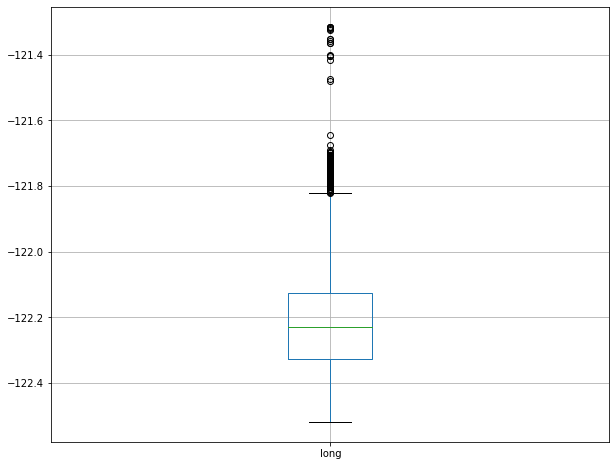

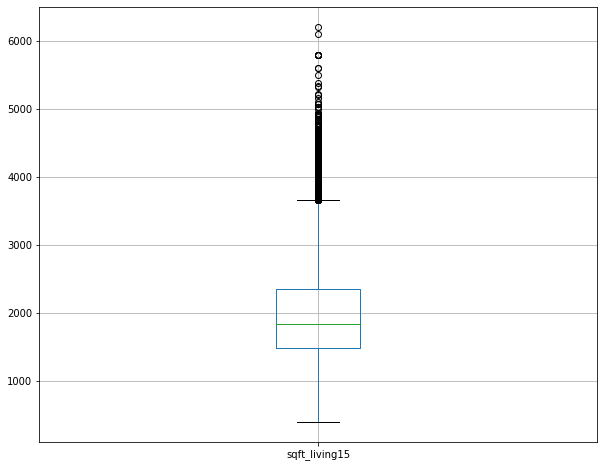

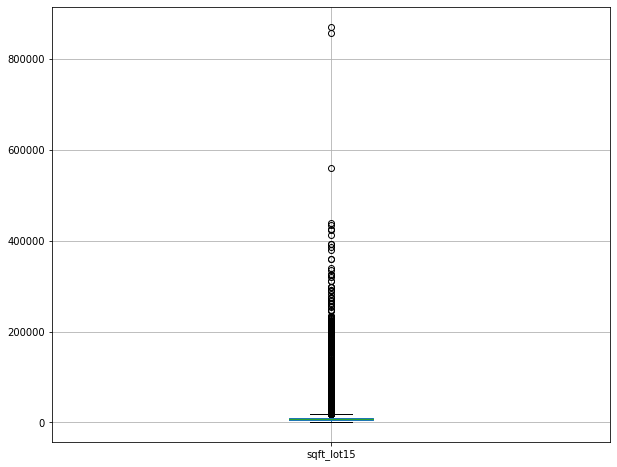

In [11]:
# Checking for outliers using boxplots
for column in data:
    plt.figure(figsize = (10, 8))
    data.boxplot([column])

There are some extreme outliers (extremely high isolated values) that we need to drop from the dataframe.

In [0]:
#Selecting indices for outliers to drop
outliers = data[(data['bedrooms'] > 30) | (data['sqft_living'] > 11000) | (data['sqft_lot'] > 1250000) | (data['sqft_basement'] > 4000) | (data['sqft_lot15'] > 300000)].index

In [0]:
# Dropping outliers
df = data.drop(outliers)

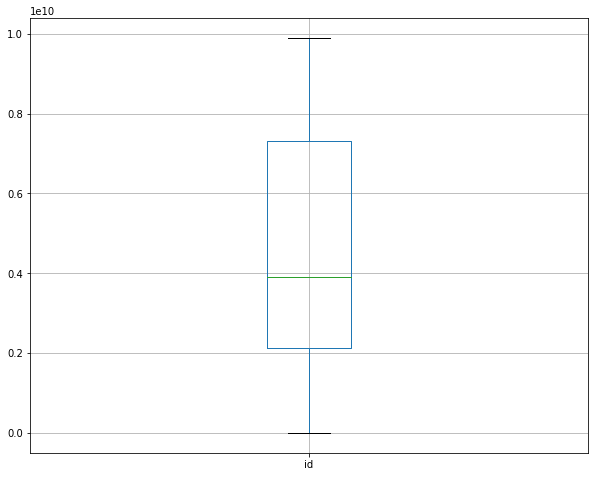

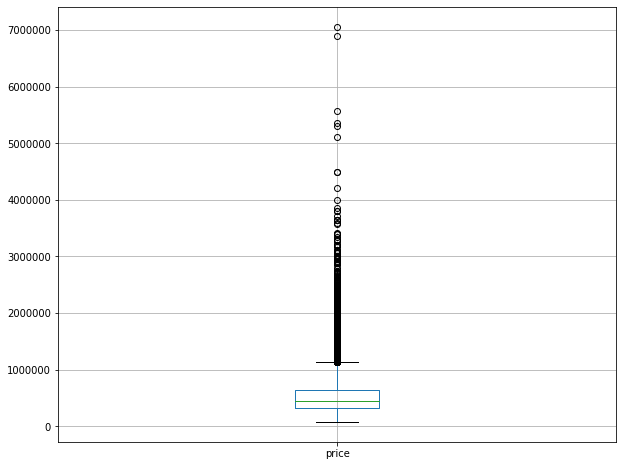

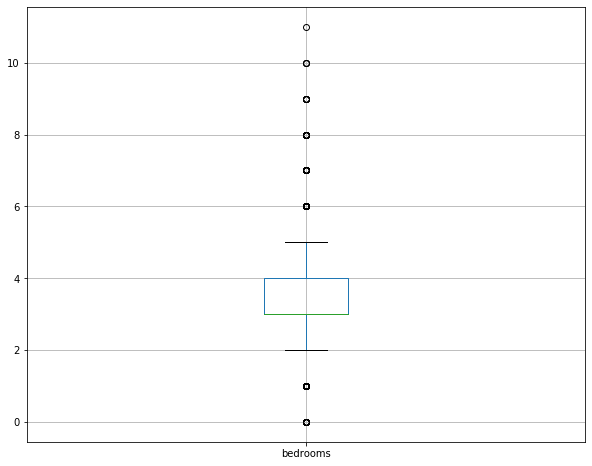

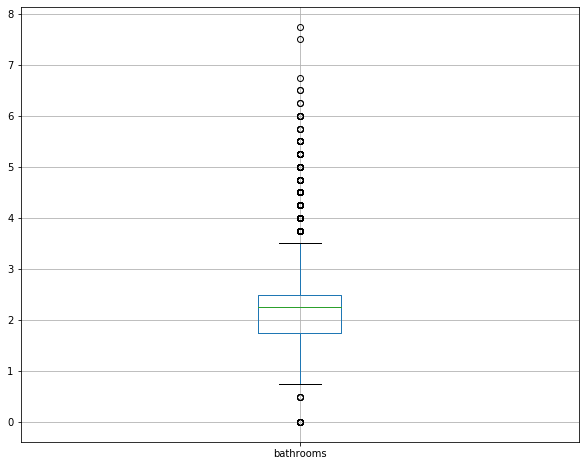

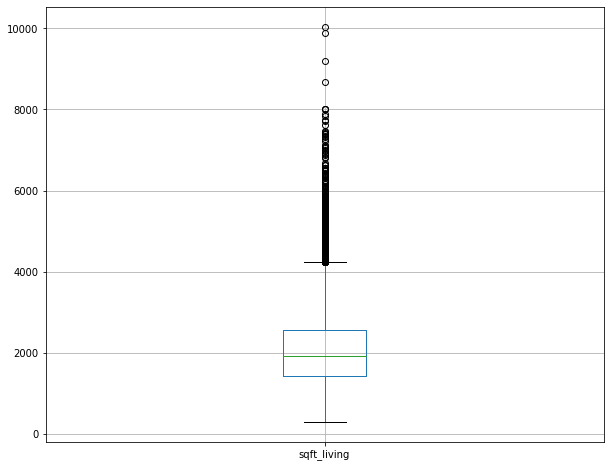

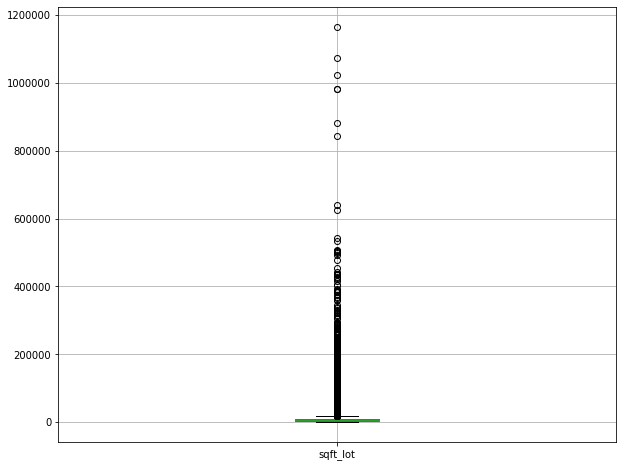

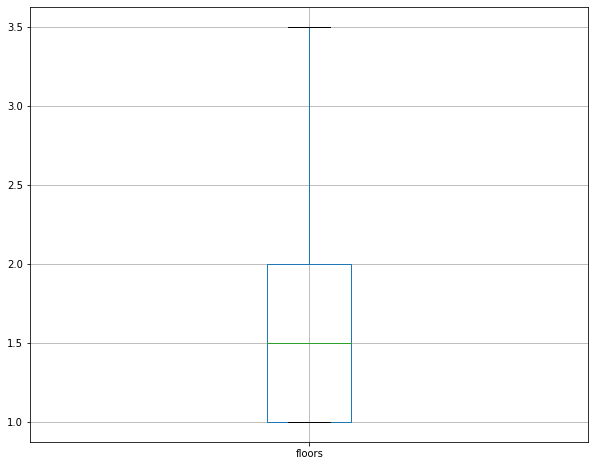

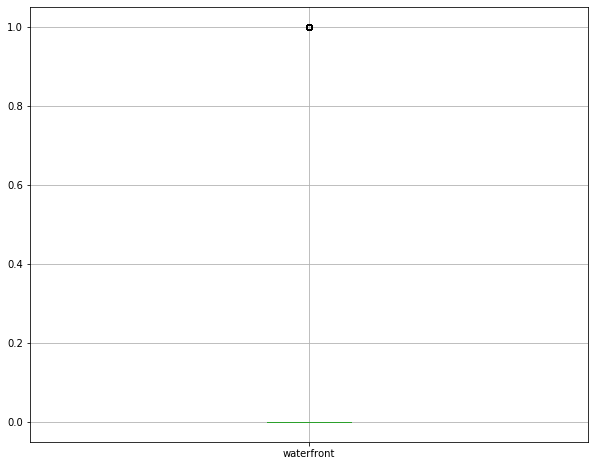

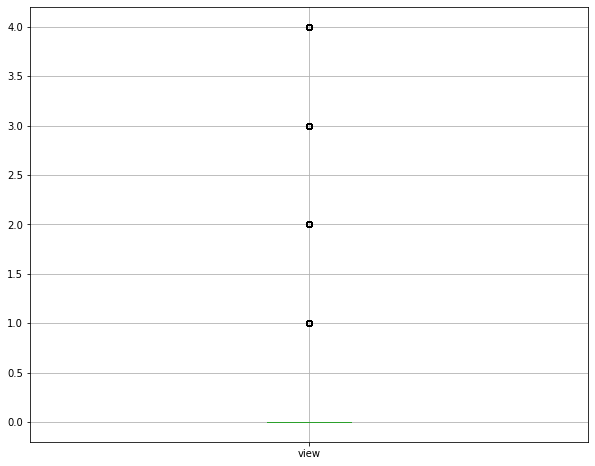

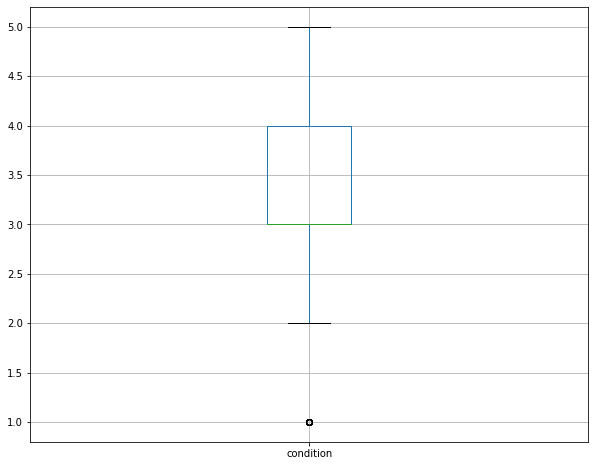

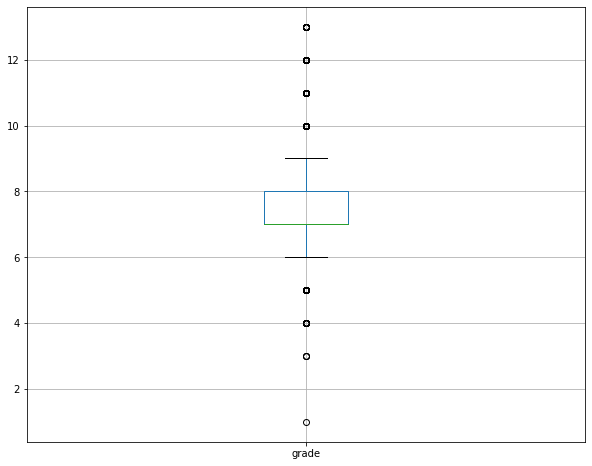

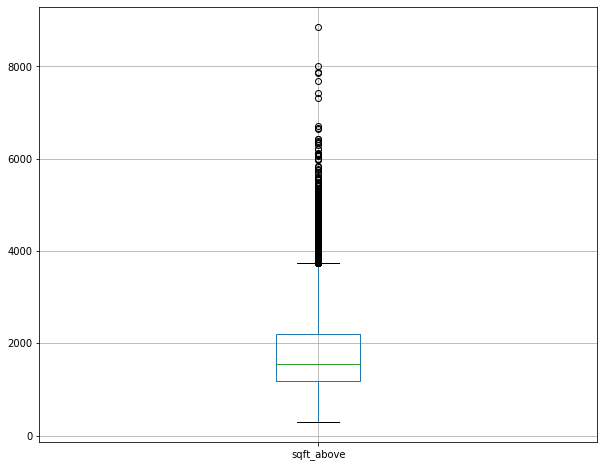

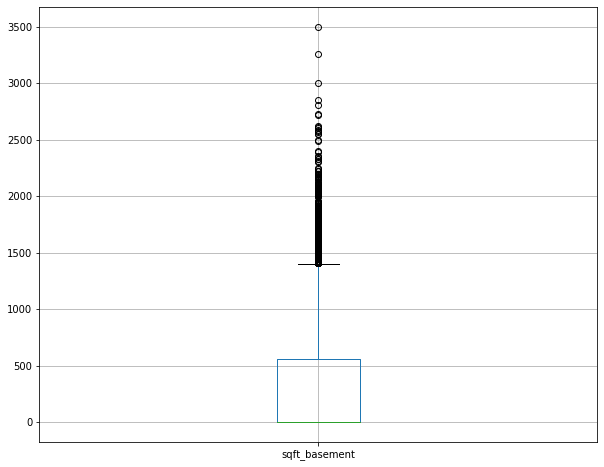

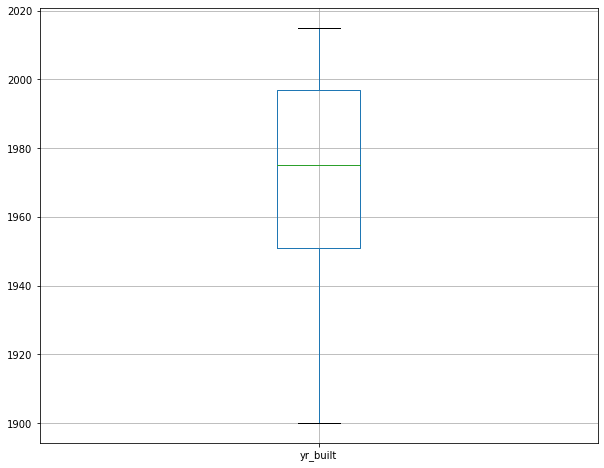

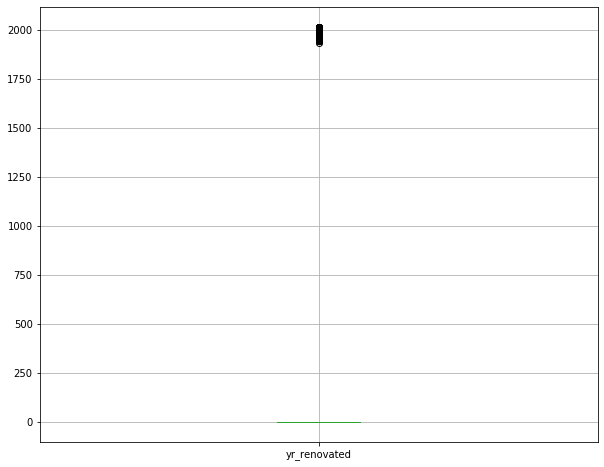

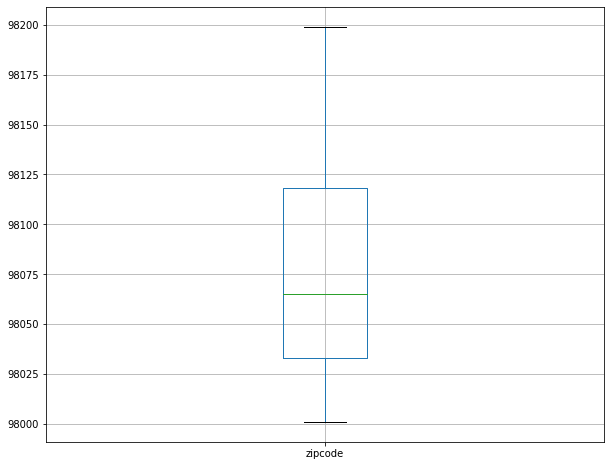

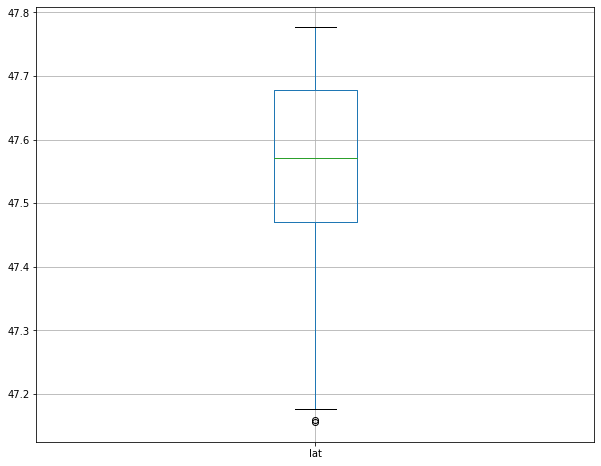

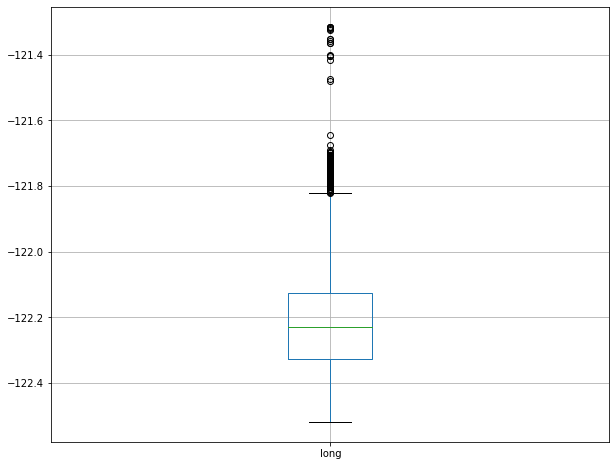

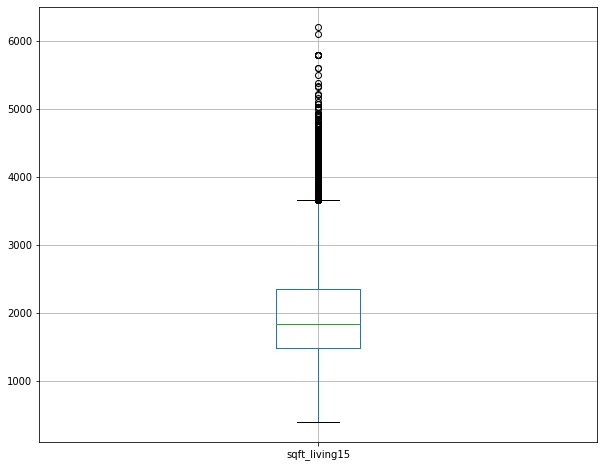

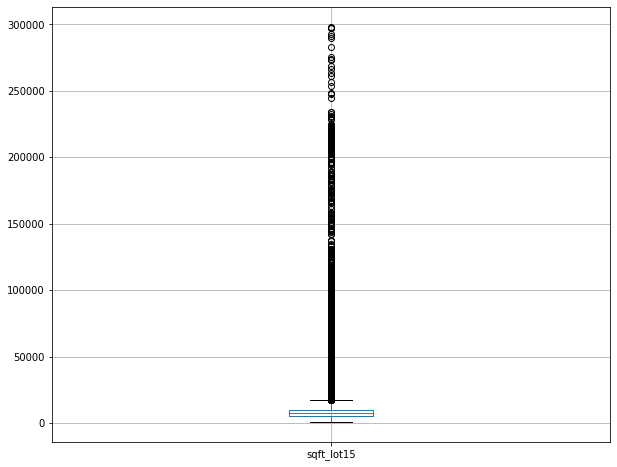

In [14]:
# Viewing plots without outliers
for column in df:
    plt.figure(figsize = (10,8))
    df.boxplot([column])

Some categorical values still seem to have outliers. We will look into the counts to see if there are anomalies.

In [15]:
# Checking for anomalies in the waterfront data
df.groupby(['waterfront']).count()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,,
0,21425,21425,21425,21425,21425,21425,21425,21425,21425,21425,21425,21425,21425,21425,21425,21425,21425,21425,21425
1,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162


In [16]:
# Checking for anomalies in the view data
df.groupby(['view']).count()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
view,,,,,,,,,,,,,,,,,,,
0,19472,19472,19472,19472,19472,19472,19472,19472,19472,19472,19472,19472,19472,19472,19472,19472,19472,19472,19472
1,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332
2,960,960,960,960,960,960,960,960,960,960,960,960,960,960,960,960,960,960,960
3,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
4,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317


In [17]:
# Checking for anomalies in the condition data
df.groupby(['condition']).count()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
condition,,,,,,,,,,,,,,,,,,,
1,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
2,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
3,14017,14017,14017,14017,14017,14017,14017,14017,14017,14017,14017,14017,14017,14017,14017,14017,14017,14017,14017
4,5669,5669,5669,5669,5669,5669,5669,5669,5669,5669,5669,5669,5669,5669,5669,5669,5669,5669,5669
5,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700


In [18]:
# Checking for anomalies in the grade data
df.groupby(['grade']).count()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
grade,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
5,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241
6,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035
7,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974
8,6066,6066,6066,6066,6066,6066,6066,6066,6066,6066,6066,6066,6066,6066,6066,6066,6066,6066,6066
9,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610,2610
10,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132


The values in these columns seem to be acceptable. 

In [19]:
# Checking for anomalies in the year renovated data
df.groupby(['yr_renovated']).count()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
yr_renovated,,,,,,,,,,,,,,,,,,,
0,20676,20676,20676,20676,20676,20676,20676,20676,20676,20676,20676,20676,20676,20676,20676,20676,20676,20676,20676
1934,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1940,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1944,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1945,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
2012,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2013,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37


In [20]:
# Checking for the proportion of houses that have been renovated
df[df['yr_renovated'] > 0].count()

id               911
price            911
bedrooms         911
bathrooms        911
sqft_living      911
sqft_lot         911
floors           911
waterfront       911
view             911
condition        911
grade            911
sqft_above       911
sqft_basement    911
yr_built         911
yr_renovated     911
zipcode          911
lat              911
long             911
sqft_living15    911
sqft_lot15       911
dtype: int64

The number of houses that have been renovated is very small, and this will probably affect distribution. We will deal with this during feature engineering.

### Missing Data

In [21]:
# Identifying the Missing Data
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Duplicates

In [22]:
# Checking for duplicates
df.duplicated().sum()

3

In [0]:
# Dropping Duplicates
duplicates = df[df.duplicated()].index
df = df.drop(duplicates)

In [24]:
# Confirming that the duplicates were dropped
df.duplicated().sum()

0

## 6. Exploratory Analysis

In [0]:
# Dropping the ID column
df = df.drop('id', 1)

### Univariate Analysis

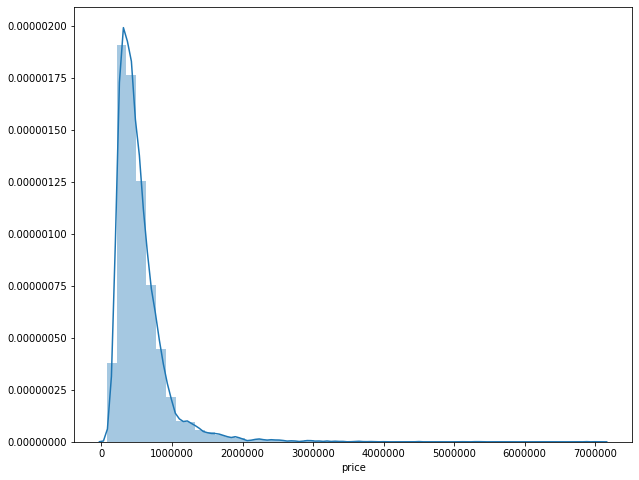

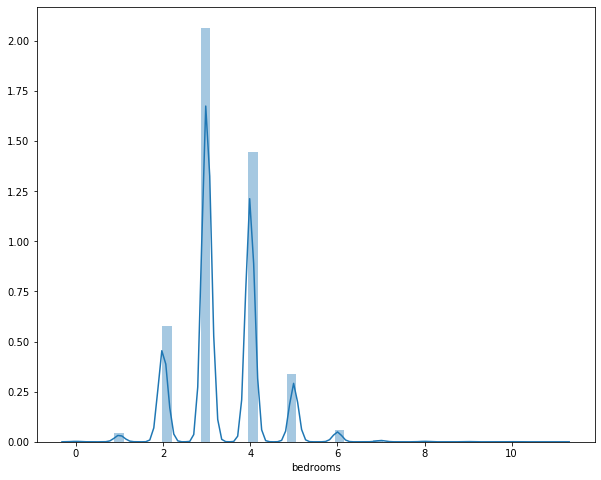

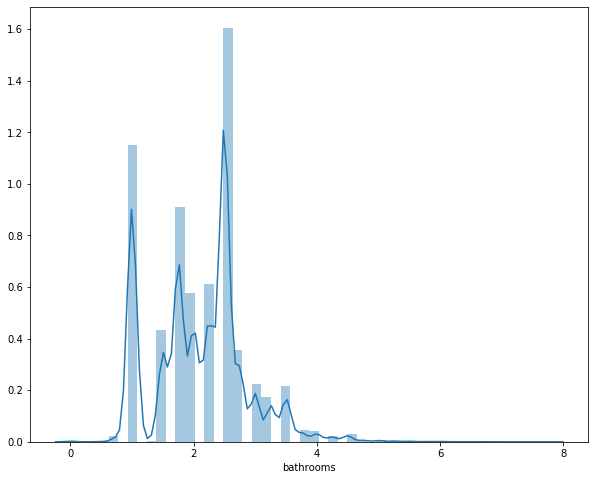

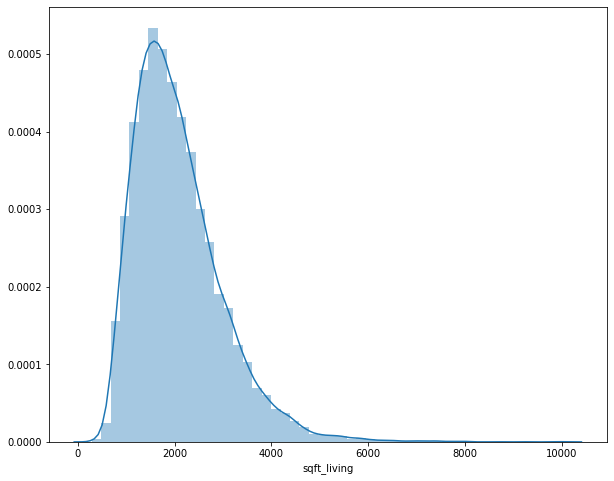

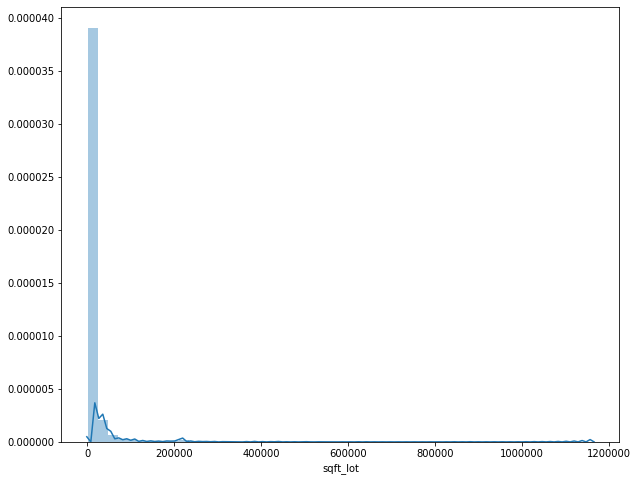

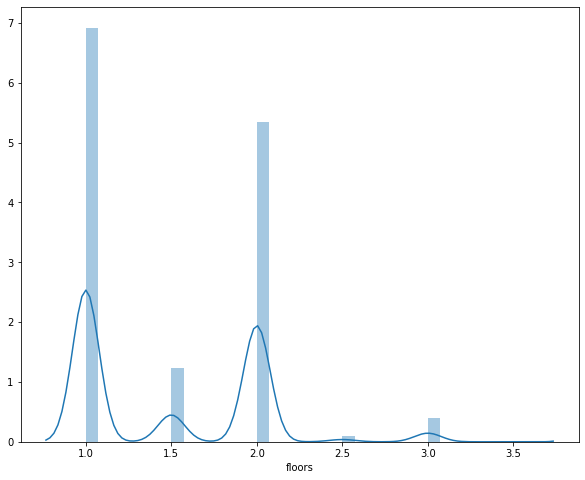

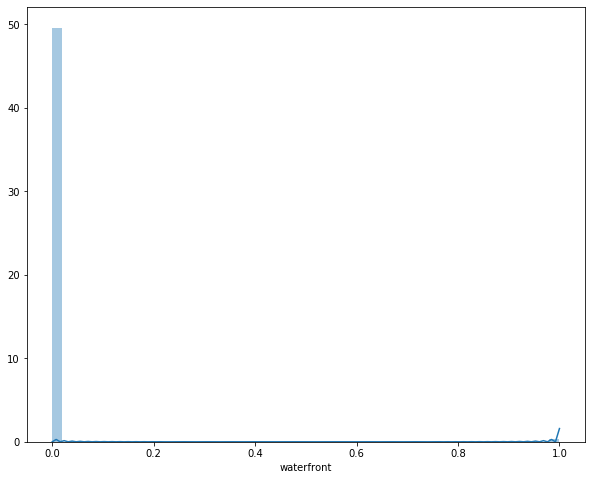

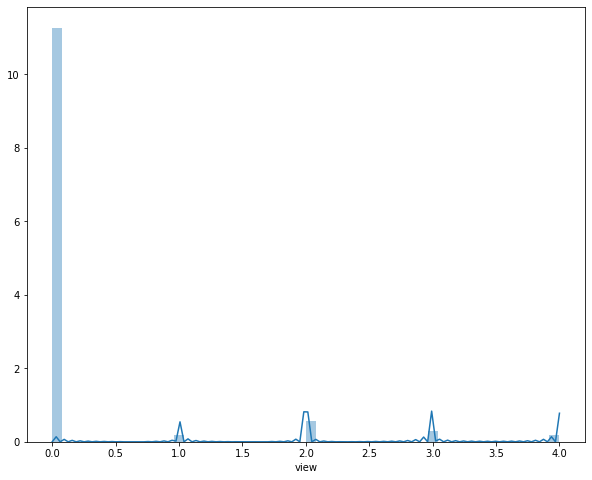

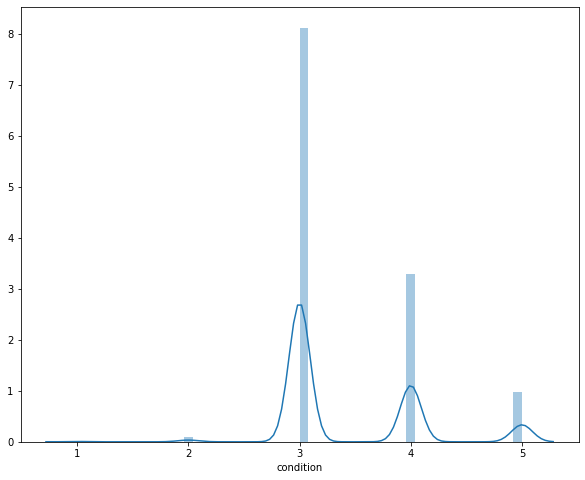

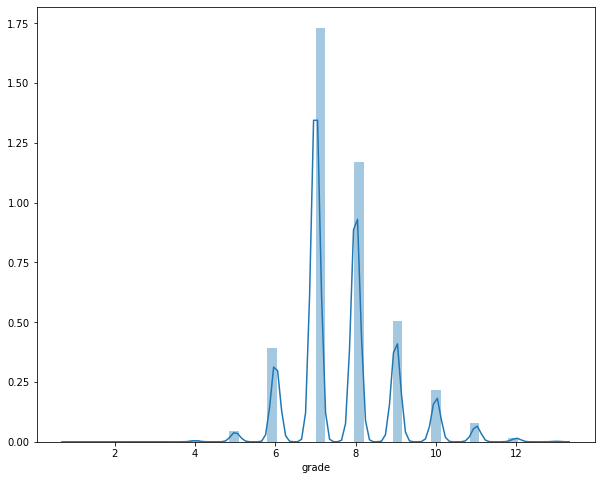

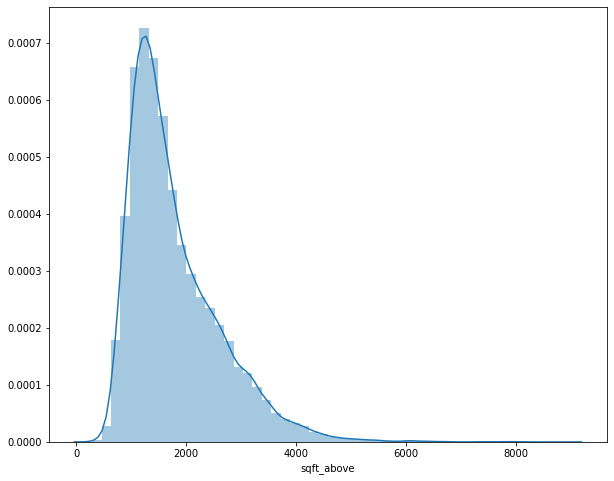

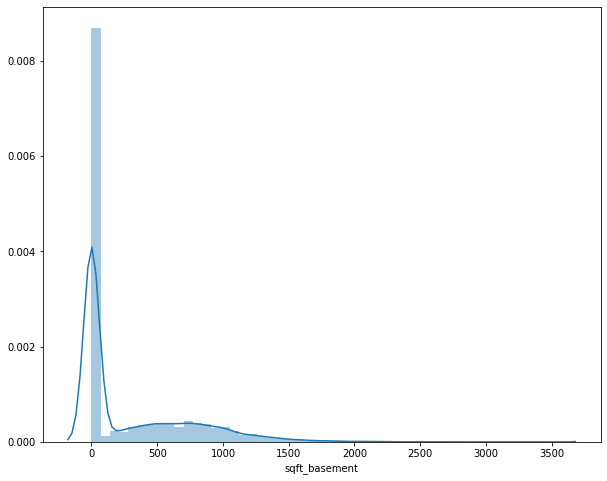

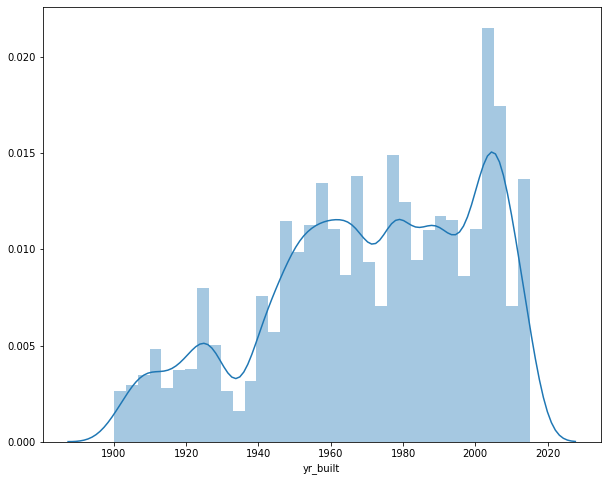

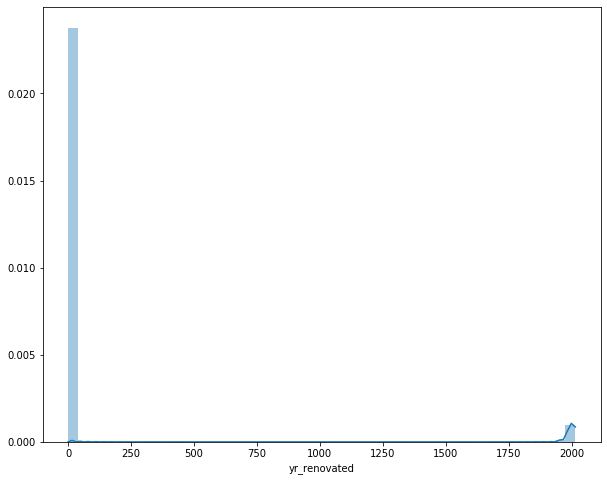

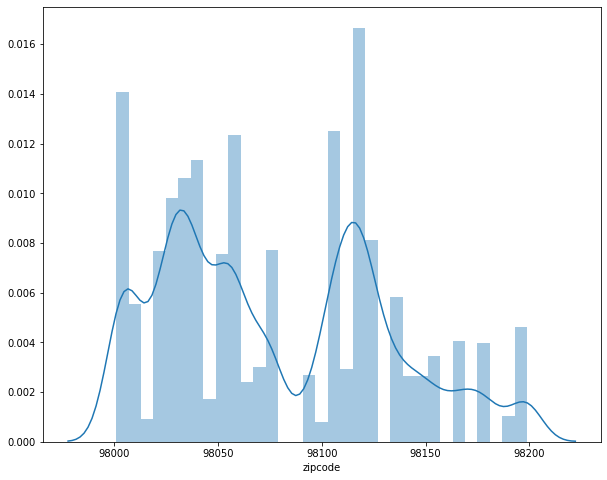

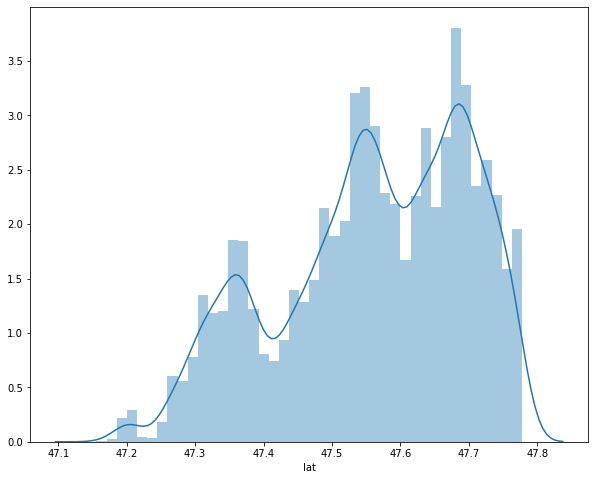

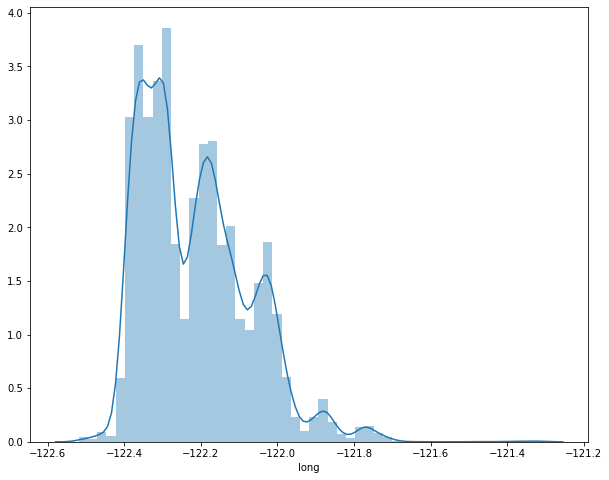

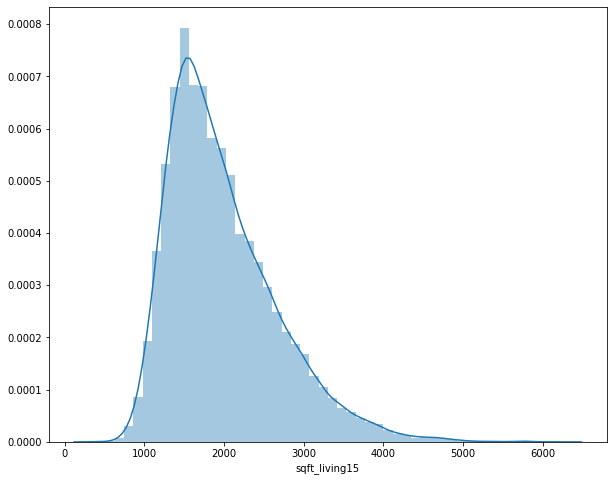

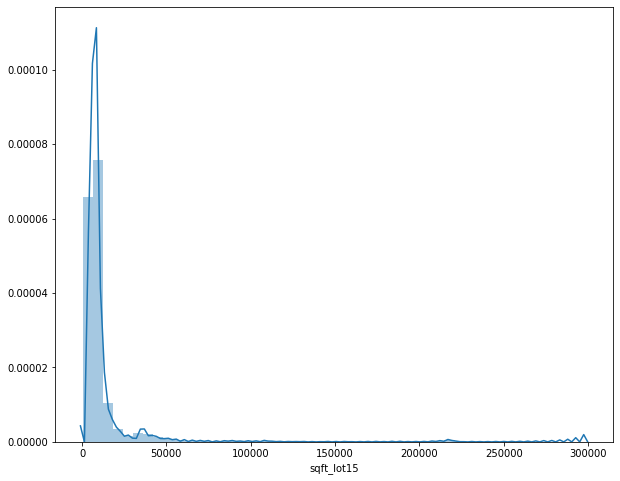

In [26]:
# Plotting histograms for all variables
for column in df:
    plt.figure(figsize = (10, 8))
    sns.distplot(df[column])

In [27]:
# Checking for skewness and kurtosis
for column in df:
    print('{:15}'.format(column), 
          'Skewness: {:05.2f}'.format(df[column].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[column].kurt())  
         )

price           Skewness: 03.75     Kurtosis: 028.67
bedrooms        Skewness: 00.52     Kurtosis: 001.84
bathrooms       Skewness: 00.47     Kurtosis: 000.95
sqft_living     Skewness: 01.33     Kurtosis: 003.47
sqft_lot        Skewness: 11.32     Kurtosis: 207.38
floors          Skewness: 00.62     Kurtosis: -00.48
waterfront      Skewness: 11.41     Kurtosis: 128.27
view            Skewness: 03.40     Kurtosis: 010.96
condition       Skewness: 01.03     Kurtosis: 000.53
grade           Skewness: 00.77     Kurtosis: 001.17
sqft_above      Skewness: 01.40     Kurtosis: 002.93
sqft_basement   Skewness: 01.51     Kurtosis: 001.93
yr_built        Skewness: -0.47     Kurtosis: -00.66
yr_renovated    Skewness: 04.56     Kurtosis: 018.77
zipcode         Skewness: 00.40     Kurtosis: -00.85
lat             Skewness: -0.48     Kurtosis: -00.68
long            Skewness: 00.89     Kurtosis: 001.06
sqft_living15   Skewness: 01.11     Kurtosis: 001.59
sqft_lot15      Skewness: 06.80     Kurtosis: 

### Bivariate Analysis

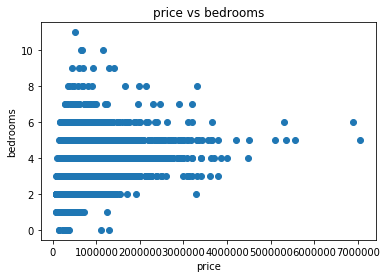

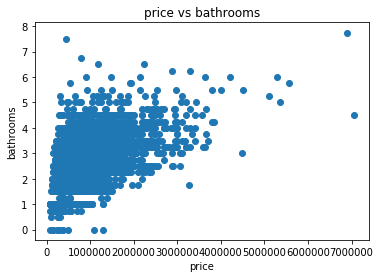

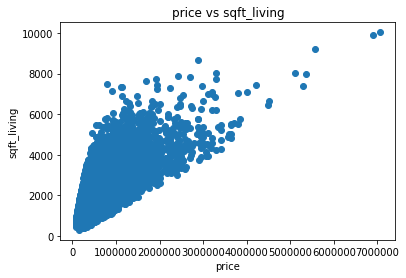

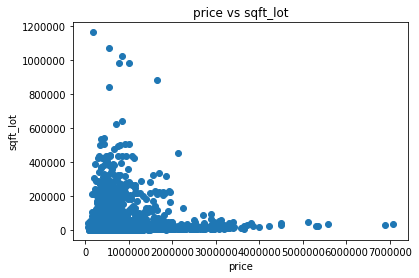

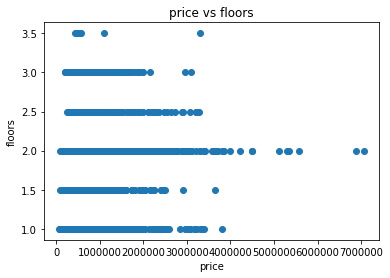

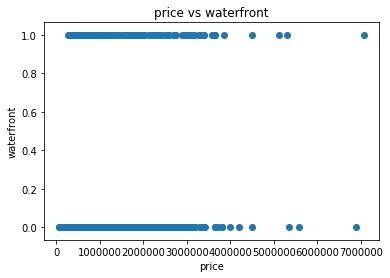

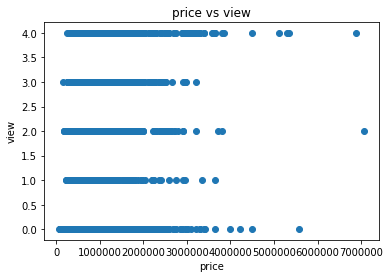

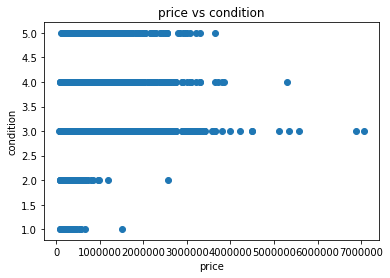

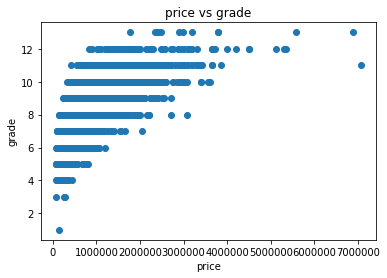

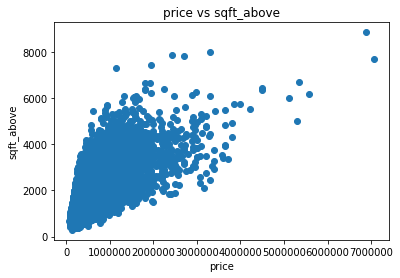

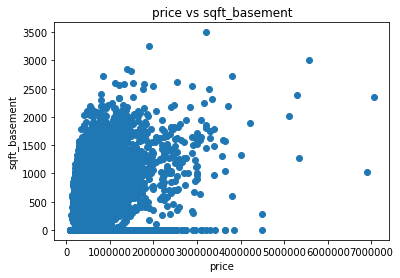

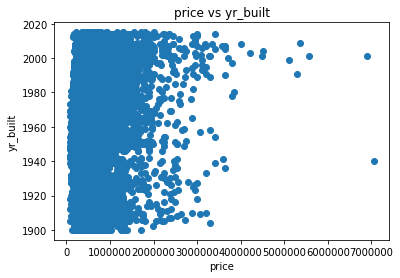

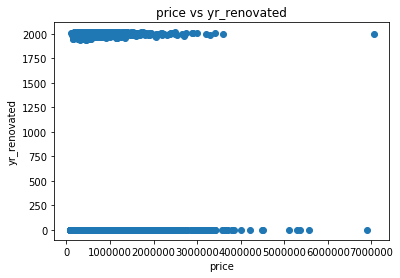

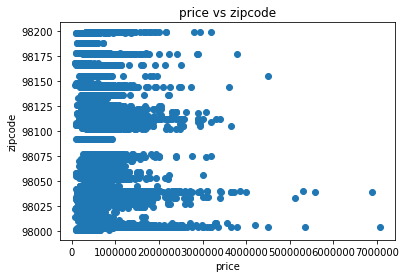

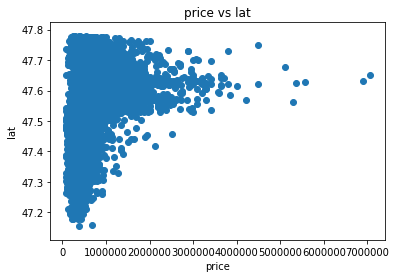

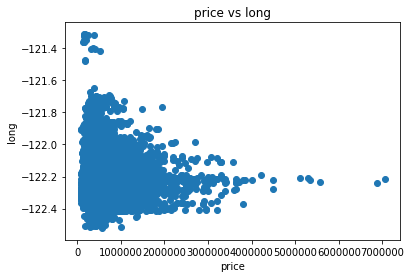

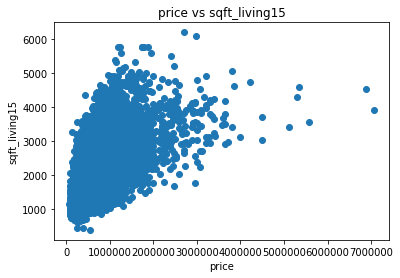

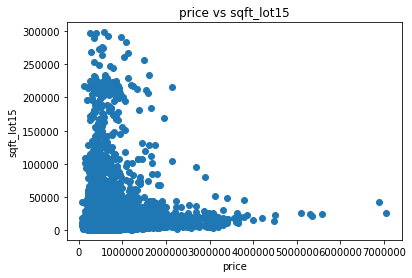

In [28]:
# Plotting variables against price
x_col = 'price'
y_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']


for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[x_col], df[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.show() 

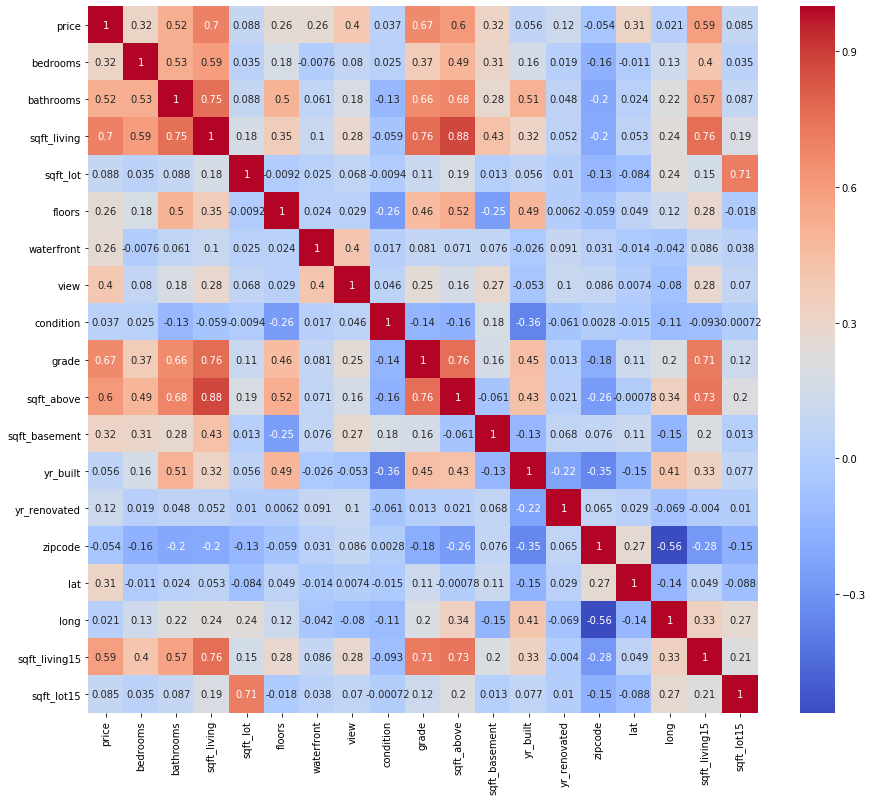

In [29]:
# Plotting a heatmap to check correlation
corr = df.corr()

f, ax = plt.subplots(figsize=(15, 13))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
# Changing year renovated column to a binary column with 1 for yes and 0 for no
df.loc[df.yr_renovated > 0, 'yr_renovated'] = 1
df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

In [81]:
# Confirming that the values for renovation changed
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [94]:
# Normalizing price column
df['price'] = (np.log(df['price'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125,47.7210,-122.319,1690,7639
2,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,12.899220,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,12.904459,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,12.899220,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


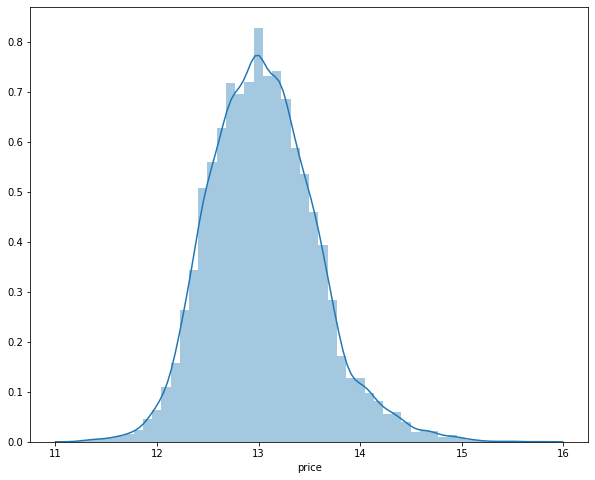

In [96]:
# Looking at the price data again
plt.figure(figsize = (10, 8))
sns.distplot(df['price'])

### Multivariate Analysis

We will conduct PCA to determine what independent variables select the variables that are responsible for the most variability in the dependent variable (price)

In [0]:
# Dividing the data into dependent and independent variables
X = df.drop('price', 1)
y = df['price']

In [98]:
# Splitting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalizing the data
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

# Applying PCA
pca = PCA()
X_train_norm = pca.fit_transform(X_train)
X_test_norm = pca.transform(X_test)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.87080313e-01, 1.11755091e-01, 9.22764997e-04, 1.53298063e-04,
       8.67177321e-05, 1.46264331e-06, 3.51870526e-07, 3.41448122e-10,
       2.58348081e-10, 2.33795276e-10, 1.96710841e-10, 1.20223010e-10,
       6.93032522e-11, 1.93057195e-11, 9.19431424e-12, 5.94274854e-12,
       3.49618124e-12, 9.56223766e-36])

In [99]:
# Checking the number of principal components where the sum of explained variance is 1
np.cumsum(explained_variance)

array([0.88708031, 0.9988354 , 0.99975817, 0.99991147, 0.99999818,
       0.99999965, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

The first six principal components explain roughly 100% of the variance in the dependent variable.

In [100]:
# Feature reduction
pca = PCA(n_components=6)
pca = pca.fit(df)
df_pca = pca.transform(df)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.84849224e-01, 1.14082818e-01, 8.47042715e-04, 1.40632371e-04,
       7.86230735e-05, 1.33659541e-06])

## 7. Implementing the Solution

### Muliple Linear Regression

In [0]:
# Separating the data into dependent and independent variables
X = df.drop('price', 1)
y = df['price']

In [102]:
# Detecting Multicollinearity with independent variables
correlations = X.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.528643,0.592652,0.034960,0.180624,-0.007583,0.080330,0.025176,0.366038,0.490073,0.308279,0.159572,0.018541,-0.157321,-0.010707,0.134125,0.402234,0.035124
bathrooms,0.528643,1.000000,0.752409,0.088052,0.501271,0.061113,0.184478,-0.125361,0.663873,0.682732,0.278000,0.508152,0.047719,-0.204208,0.024130,0.222987,0.568798,0.086608
sqft_living,0.592652,0.752409,1.000000,0.175080,0.354529,0.100879,0.280754,-0.058833,0.763765,0.875864,0.428516,0.320798,0.051621,-0.200214,0.052808,0.240298,0.759355,0.188711
sqft_lot,0.034960,0.088052,0.175080,1.000000,-0.009213,0.024939,0.067951,-0.009359,0.113863,0.186521,0.012908,0.056140,0.010321,-0.133802,-0.083682,0.236096,0.154608,0.706870
floors,0.180624,0.501271,0.354529,-0.009213,1.000000,0.024316,0.028818,-0.263626,0.458020,0.524345,-0.248442,0.489403,0.006138,-0.058967,0.049415,0.124985,0.279558,-0.018217
waterfront,-0.007583,0.061113,0.100879,0.024939,0.024316,1.000000,0.401790,0.017053,0.081341,0.070893,0.075926,-0.026472,0.091276,0.030688,-0.014401,-0.042011,0.085872,0.037501
view,0.080330,0.184478,0.280754,0.067951,0.028818,0.401790,1.000000,0.046428,0.249942,0.163955,0.273744,-0.053322,0.102150,0.085773,0.007350,-0.080049,0.279568,0.069989
condition,0.025176,-0.125361,-0.058833,-0.009359,-0.263626,0.017053,0.046428,1.000000,-0.144702,-0.158752,0.175549,-0.361095,-0.060785,0.002767,-0.014892,-0.106178,-0.092682,-0.000719
grade,0.366038,0.663873,0.763765,0.113863,0.458020,0.081341,0.249942,-0.144702,1.000000,0.755781,0.164713,0.447296,0.012454,-0.184787,0.114392,0.197807,0.713711,0.124022
sqft_above,0.490073,0.682732,0.875864,0.186521,0.524345,0.070893,0.163955,-0.158752,0.755781,1.000000,-0.060687,0.425860,0.020897,-0.261673,-0.000780,0.343806,0.733401,0.201366


In [126]:
# Checking VIF scores
vif =pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.713916,-0.488075,-1.838203e+00,0.059997,0.053535,0.065030,0.119909,-0.045607,0.331733,7.157566e-01,3.646831e-01,0.146797,0.046830,0.084990,0.056457,0.014107,0.033199,0.081866
bathrooms,-0.488075,3.337510,-1.355327e+00,-0.036196,-0.674259,0.008080,-0.043494,-0.137368,-0.273404,-5.421307e-03,-3.998214e-01,-0.937143,-0.258817,0.038524,-0.041367,0.051280,0.079261,0.087004
sqft_living,-1.837516,-1.354049,2.021832e+13,-0.138897,1.059203,-0.162086,0.128572,0.028971,-1.659571,-1.830168e+13,-9.774536e+12,0.536070,0.189037,-0.277026,-0.074332,0.241893,-1.071147,-0.149555
sqft_lot,0.059997,-0.036196,-1.395255e-01,2.034543,0.045607,0.025821,-0.050002,0.036646,-0.044853,-9.565711e-02,1.286065e-02,0.102752,0.020744,0.005148,0.045925,-0.127445,0.187539,-1.390799
floors,0.053535,-0.674259,1.059008e+00,0.045607,2.015547,-0.007522,-0.039436,0.088530,-0.229902,-1.469447e+00,9.816190e-02,-0.481512,-0.081549,-0.171385,-0.126488,0.159944,0.272673,0.087798
waterfront,0.065030,0.008080,-1.622615e-01,0.025821,-0.007522,1.204095,-0.492944,-0.012817,0.051069,3.397353e-02,7.722078e-02,-0.019101,-0.063839,0.022675,0.009739,0.029389,0.055062,-0.028508
view,0.119909,-0.043494,1.298594e-01,-0.050002,-0.039436,-0.492944,1.433051,-0.021748,-0.185919,-7.807171e-02,-3.190856e-01,0.151220,-0.040114,-0.140141,0.118195,0.070381,-0.327875,-0.002364
condition,-0.045607,-0.137368,2.818731e-02,0.036646,0.088530,-0.012817,-0.021748,1.249485,-0.052229,2.453714e-02,-1.147480e-01,0.561627,0.206481,0.161913,0.063315,-0.006236,0.079570,-0.039912
grade,0.331733,-0.273404,-1.655866e+00,-0.044853,-0.229902,0.051069,-0.185919,-0.052229,3.425143,-1.414214e-01,2.951999e-01,-0.632082,-0.069981,0.085237,-0.328678,0.389539,-0.906997,0.080441
sqft_above,0.716435,-0.004768,-1.830168e+13,-0.096058,-1.469025,0.033879,-0.077359,0.023572,-0.137728,1.656673e+13,8.847936e+12,0.016137,-0.173254,0.170613,0.243816,-0.552056,-0.595398,-0.018987


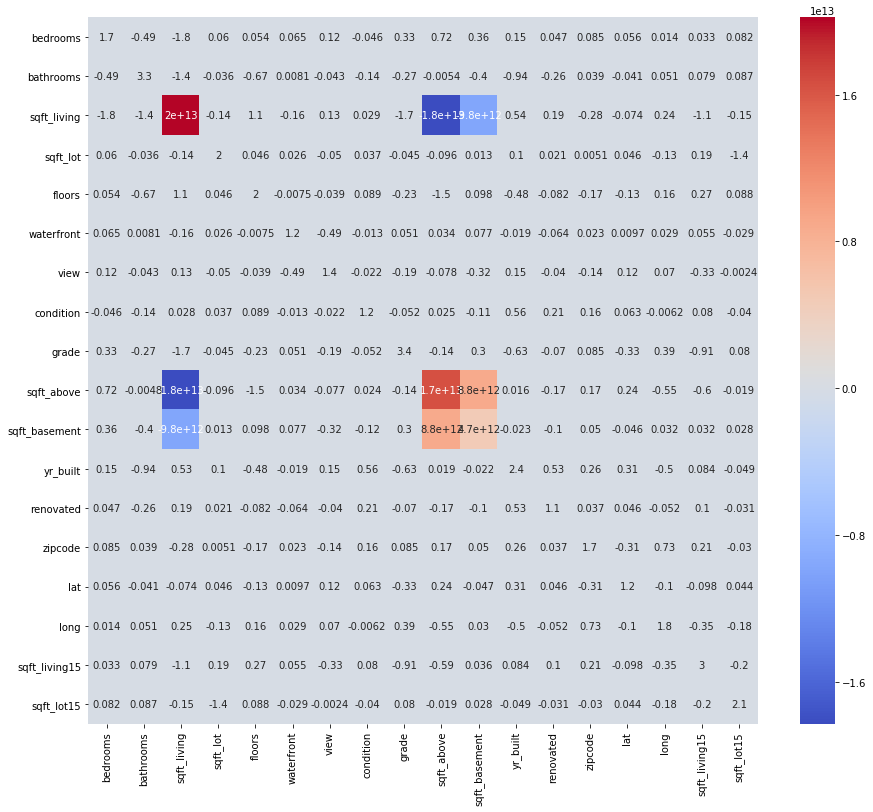

In [128]:
f, ax = plt.subplots(figsize=(15, 13))
sns.heatmap(vif, annot = True, cmap = 'coolwarm',
            xticklabels=vif.columns.values,
            yticklabels=vif.columns.values)

Some columns are correlated but they all have value in this analysis, so they will not be removed.

In [104]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Training the algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Check the coefficients
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making predictions based on the model
y_pred_mult = regressor.predict(X_test)

# Evaluating the model
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_mult))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mult)))
print ('Adjusted R-squared score', 1 - (1 - regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

Mean Squared Error: 0.0621249810315484
Root Mean Squared Error: 0.2492488335610588
Adjusted R-squared score 0.7706199325327973


Testing for heteroskedasticity

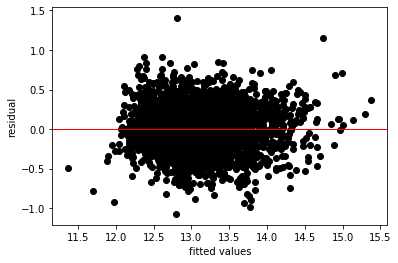

In [105]:
# Plotting residuals
residuals = np.subtract(y_pred_mult, y_test)

plt.scatter(y_pred_mult, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [106]:
# Bartlett's test
test_result, p_value = sp.stats.bartlett(y_pred_mult, residuals)
print('test statistic:', test_result, 'p-value:', p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_mult)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('critical value:', critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

test statistic: 1570.7980295377188 p-value: 0.0
critical value: inf
the variances are homogeneous!


Cross Validation

In [107]:
# Cross Validation
folds = KFold(n_splits=10)

# Creating and assessing models
RMSES = []
count = 1
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  # Evaluating the model
  print('Model ' + str(count))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('Adjusted R-squared score', 1 - (1 - regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
  count = count + 1


Training model 1
Model 1
Root Mean Squared Error: 0.24708582647637736
Adjusted R-squared score 0.7705707833082416

Training model 2
Model 2
Root Mean Squared Error: 0.251100444805463
Adjusted R-squared score 0.7706122234878665

Training model 3
Model 3
Root Mean Squared Error: 0.25548492470335077
Adjusted R-squared score 0.7705733636850713

Training model 4
Model 4
Root Mean Squared Error: 0.2532437612124548
Adjusted R-squared score 0.7705920420654013

Training model 5
Model 5
Root Mean Squared Error: 0.25296605340313416
Adjusted R-squared score 0.770589403654142

Training model 6
Model 6
Root Mean Squared Error: 0.25325254518993634
Adjusted R-squared score 0.7705866524357059

Training model 7
Model 7
Root Mean Squared Error: 0.2522411362984667
Adjusted R-squared score 0.7706081014879602

Training model 8
Model 8
Root Mean Squared Error: 0.24922712349330906
Adjusted R-squared score 0.770594103728742

Training model 9
Model 9
Root Mean Squared Error: 0.253095024650967
Adjusted R-square

The errors and R-squared values are similar for all 10 models, so the model does not appear to be biased

###Quantile Regression

In [169]:
# Defining quantiles
quantiles = [0.25,0.5,0.75]

# Fitting the model
for i in quantiles:
  mod = smf.quantreg('y ~ X', df)
  res = mod.fit(i)
  print(res.summary())

ValueError: ignored

In [0]:
# Plotting quantile models against our original data.

plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[1].params['Intercept'] + models[4].params['x'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[2].params['Intercept'] + models[8].params['x'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

In [0]:
# Plotting the changes in the quantile coeffiecients

plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--']
plt.show()

### Ridge Regression

In [0]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [112]:
# Creating a baseline linear model
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

# Getting the coefficients for the baseline model
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

0.06343383435956758


{'bathrooms': 9.988505307887007e-05,
 'bedrooms': 0.07022634962011698,
 'condition': 0.15736960712309953,
 'floors': 0.3700587841179922,
 'grade': 4.194861390139134e-05,
 'lat': -0.1591038381133208,
 'long': 9.627970547182964e-05,
 'price': -0.01516787429583213,
 'renovated': -0.00065125687712038,
 'sqft_above': 5.793643922454904e-05,
 'sqft_basement': -0.003430090792999566,
 'sqft_living': 4.250723650724833e-07,
 'sqft_living15': -1.9465543699137555e-07,
 'sqft_lot': 0.07532934109126262,
 'view': 0.06227888731393605,
 'waterfront': 0.060494203384604976,
 'yr_built': 0.07235679891398177,
 'zipcode': 1.4033280395115306}

In [0]:
# Determining the value of the L2 alpha hyperparameter using a grid. 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [114]:
# Running the model and determining its strength
search.fit(X,y)
print(search.best_params_)

print(abs(search.best_score_))

{'alpha': 0.001}
0.06405269429669663


We should set alpha to 0.001.

The best possible mean squared error is 0.06405269429669663 which is worse than the linear model that had a mse of 0.06343383435956758


In [143]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error 
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.06343396295132712


The MSE value for the optimised ridge regression model is closer to the mse for the baseline linear model, but still a bit higher. It seems that there is not much difference between the models i.e. the penalization was not effective on this dataset.

In [144]:
# Getting the coefficients for the ridge model
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.06796554829624867,
 'bedrooms': 0.053789549500616624,
 'condition': 0.18423198793983117,
 'floors': 0.03191630931772163,
 'grade': 0.05550816181722412,
 'lat': -0.022385110263422447,
 'long': 0.06604532734005021,
 'price': -0.01370780206443068,
 'renovated': -0.03470587323511056,
 'sqft_above': 0.03665203939402456,
 'sqft_basement': -0.10045075791417166,
 'sqft_living': 0.015907414039664905,
 'sqft_living15': -0.004548613151502988,
 'sqft_lot': 0.040630273995327024,
 'view': 0.04053445233138977,
 'waterfront': 0.046256234570939664,
 'yr_built': 0.01458834039438035,
 'zipcode': 0.1940999402854304}

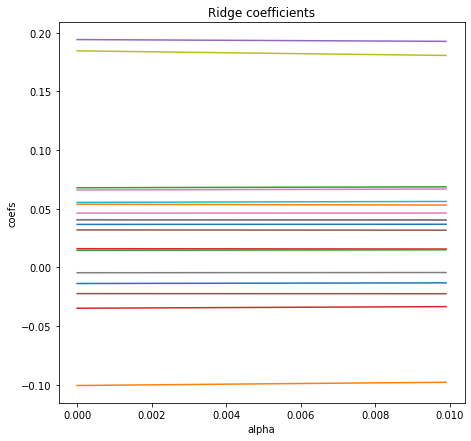

In [142]:
# Building Ridge models for 200 values of alpha and writing the coefficients into an array
coefsRidge = [] 

alphasRidge = np.arange (0, 0.01, 0.0001) 
for i in range(100):
    ridge = Ridge(alphasRidge[i], normalize=True)
    ridge.fit(X,y)

    coefsRidge.append(ridge.coef_) 

# Building Ridge coefficient plots
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasRidge, coefsRidge)
plt.title('Ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

The coefficients do not change much with the ridge model, which means that the penalty did not have much effect on the model for this data.

### Lasso Regression

In [149]:
import warnings
warnings.filterwarnings("ignore")

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting the data into training and test sets, building Lasso, and choosing the regularization parameter with the help of GridSearch. 
parameters = {'alpha': np.concatenate((np.arange(-2,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 1000, 5)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 1.7763568394002505e-15}
lasso score: 0.7752744169513592
linear score: 0.7752744169513589
lasso MSE: 0.062124981031554165
linear MSE: 0.06212498103155425
lasso best estimator coef: [-0.01437925  0.05383277  0.30052734  0.01792337  0.04165189  0.03207603
  0.04529961  0.04136381  0.18383754 -0.15465475 -0.07524884 -0.10068158
  0.01358601 -0.03556043  0.19407997 -0.02314878  0.06675314 -0.00493416]
linear coef: [-0.01437925  0.05383277  0.06824606  0.01792337  0.04165189  0.03207603
  0.04529961  0.04136381  0.18383754  0.05560688  0.03704743 -0.10068158
  0.01358601 -0.03556043  0.19407997 -0.02314878  0.06675314 -0.00493416]


In [183]:
# Running the model with the optimised lasso parameters
lasso = linear_model.Lasso(alpha=1.7763568394002505e-15)
lasso.fit(X_train, y_train)
mse_lasso =(mean_squared_error(y_true=y,y_pred=lasso.predict(X)))
print('MSE:' , mse_lasso)
r2_lasso = metrics.r2_score(y_true = y, y_pred=lasso.predict(X))
print('R-squared score:', r2)
print("lasso coef:", lasso.coef_)

MSE: 0.06344062151203783
R-squared score: 0.7706494211248767
lasso coef: [-0.01437925  0.05383277  0.30052734  0.01792337  0.04165189  0.03207603
  0.04529961  0.04136381  0.18383754 -0.15465475 -0.07524884 -0.10068158
  0.01358601 -0.03556043  0.19407997 -0.02314878  0.06675314 -0.00493416]


This model is less accurate than the linear model and the value for one coefficient increased. Multicollinearity in the data may be affecting the regression model.

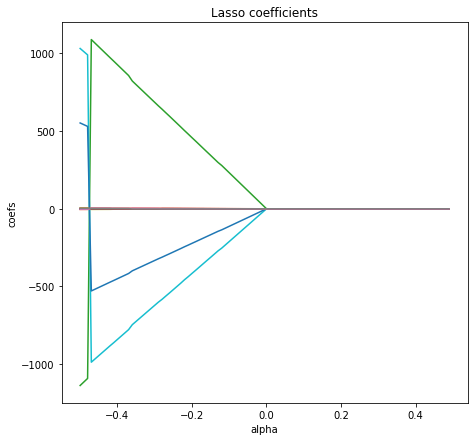

In [172]:
# Building Lasso models for 200 values of alpha and writing the coefficients into an array
coefsLasso = [] 

alphasLasso = np.arange (-0.5, 0.5, 0.01) 
for i in range(100):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

From the plot, we can see that all of the coefficients approach zero at around alpha = 0. This means that the penalty has effectively reduced coefficients to make the model less complex. The model would require removing higly correlated variables before future use.

### Elastic Net Regression

In [120]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Building a baseline linear model 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print('MSE:', first_model) 
r2 = metrics.r2_score(y_true = y, y_pred=regression.predict(X))
print('R-squared score:', r2)

# Getting the coefficients for the baseline model
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_, df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

MSE: 0.06343383435956766
R-squared score: 0.7708357527566513


{'bathrooms': 0.06788233551184804,
 'bedrooms': 0.053867848147249764,
 'condition': 0.18464180006731432,
 'floors': 0.03193936665388693,
 'grade': 0.055424308516663565,
 'lat': -0.02237381045335852,
 'long': 0.06595579462589421,
 'price': -0.013763839025514231,
 'renovated': -0.03484792353597561,
 'sqft_above': 0.036636921886080864,
 'sqft_basement': -0.1007400605160077,
 'sqft_living': 0.015936568737088253,
 'sqft_living15': -0.004566171858150909,
 'sqft_lot': 0.04067171169420683,
 'view': 0.040529375262571624,
 'waterfront': 0.04624685083203024,
 'yr_built': 0.014540534296347496,
 'zipcode': 0.19425205422549183}

In [121]:
# Normalizing the data and finding the best parameter using a grid
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8, 1]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 1}


0.06409825988497392

The best hyperparameters for this model are alpha = 1e-05 and L1 ratio = 1

In [171]:
# Setting our hyperparameters to the recommended values and running the model on the data.
elastic=ElasticNet(normalize=True,alpha=1e-05, l1_ratio= 1)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print('MSE:' , second_model)
r2 = metrics.r2_score(y_true = y, y_pred=elastic.predict(X))
print('R-squared score:', r2)

# Getting the coefficients for the elastic net model
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

MSE: 0.06348541190714814
R-squared score: 0.7706494211248767


{'bathrooms': 0.12873800737963417,
 'bedrooms': 0.05175427529596748,
 'condition': 0.1850709995798747,
 'floors': 0.031004282569022715,
 'grade': 0.0,
 'lat': -0.019585825439730337,
 'long': 0.06410962203868777,
 'price': -0.009563984081476015,
 'renovated': -0.030585789990010746,
 'sqft_above': 0.005528465111257507,
 'sqft_basement': -0.097672756582068,
 'sqft_living': 0.011214640696909844,
 'sqft_living15': -0.0,
 'sqft_lot': 0.03780451640360929,
 'view': 0.03936744859678849,
 'waterfront': 0.04636774347415645,
 'yr_built': 0.013868982892056573,
 'zipcode': 0.1929387010799463}

The coefficients have been reduced and some reduced to zero, without losing accuracy.

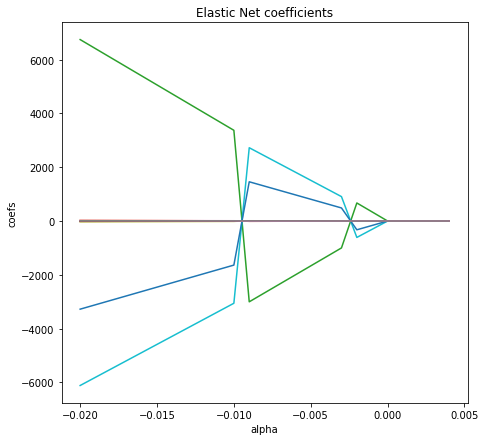

In [181]:
coefsEN = [] 

alphasEN = np.arange (-0.02, 0.005, 0.001)
for i in range(25):
    elastic=ElasticNet(normalize=True,alpha=alphasEN[i], l1_ratio= 1)
    elastic.fit(X,y)

    coefsEN.append(elastic.coef_) 

# Building Lasso coefficient plots
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasEN, coefsEN)
plt.title('Elastic Net coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

At approximately alpha = 0, the coefficients reduce to 0.

## 8. Evaluating the solution

The elastic net regression model with alpha = 1e-05 and L1 ratio = 1 is the best model for this data. This is because it reduces the features in the dataset without losing accuracy.
Given the multicollinearity in the data, the lasso model (where L1 ratio = 1) is not the best choice.
The linear model is the most complex but with similar accuracy to all other models.